In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [3]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [4]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

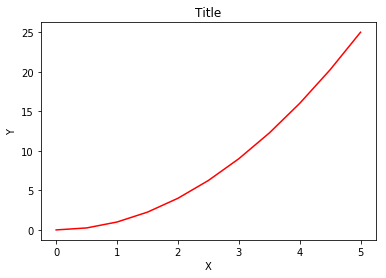

In [5]:
plt.plot(x, y, 'r')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Title')
plt.show()

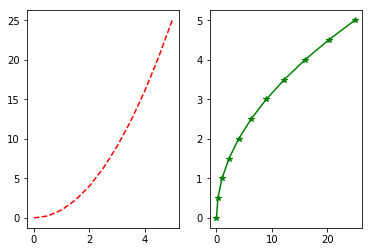

In [6]:
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(y,x,'g*-')

In [7]:
df1 = pd.read_csv('city_data.csv')
df2 = pd.read_csv('ride_data.csv')

In [8]:
df3 = pd.merge(df1, df2, how='outer')

In [9]:
df3

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [11]:
cities = df3['city'].unique().tolist()
rows = []
print(cities)
for s in cities:
    sumrides = (df3[df3['city'] == s]).count()
    avgfare = (df3[df3['city'] == s].sum()['fare']) / sumrides
    sumdrivers = (df3[df3['city'] == s]).sum()['driver_count']
    rows.append({'city' : s, 'fares' : avgfare, 'drivers' : sumdrivers, 'rides' :sumrides})
df4 = pd.DataFrame(rows)
df4

['Richardfort', 'Williamsstad', 'Port Angela', 'Rodneyfort', 'West Robert', 'West Anthony', 'West Angela', 'Martinezhaven', 'Karenberg', 'Barajasview', 'Robertport', 'Joneschester', 'Leahton', 'West Christopherberg', 'Johnton', 'Reynoldsfurt', 'Port David', 'New Kimberlyborough', 'Carriemouth', 'Rogerston', 'Jerryton', 'Loganberg', 'Simpsonburgh', 'Port Frank', 'South Latoya', 'West Samuelburgh', 'Grahamburgh', 'West Patrickchester', 'North Madeline', 'South Jack', 'Liumouth', 'West Ericstad', 'Royland', 'Erikaland', 'Huntermouth', 'Justinberg', 'South Evanton', 'Lake Danielberg', 'East Kaylahaven', 'West Heidi', 'Karenside', 'South Karenland', 'West Gabriel', 'North Markport', 'Raymondhaven', 'North Barbara', 'Lake Scottton', 'West Josephberg', 'Pattyland', 'South Michelleport', 'Christopherfurt', 'Valentineton', 'South Phillip', 'North Jason', 'Deanville', 'Lake Jonathanshire', 'New Paulton', 'Hurleymouth', 'Port Johnbury', 'North Jasmine', 'New Paulville', 'Amandaburgh', 'Williamsvi

,city,drivers,fares,rides
0,Richardfort,1064,city 22.373214 driver_count 22.3...,city 28 driver_count 28 type ...
1,Williamsstad,1357,city 24.362174 driver_count 24.3...,city 23 driver_count 23 type ...
2,Port Angela,1273,city 23.836842 driver_count 23.8...,city 19 driver_count 19 type ...
3,Rodneyfort,782,city 28.616957 driver_count 28.6...,city 23 driver_count 23 type ...
4,West Robert,1209,city 25.123871 driver_count 25.1...,city 31 driver_count 31 type ...
5,West Anthony,2100,city 24.736667 driver_count 24.7...,city 30 driver_count 30 type ...
6,West Angela,1872,city 25.99 driver_count 25.99 ty...,city 39 driver_count 39 type ...
7,Martinezhaven,600,city 22.65125 driver_count 22.65...,city 24 driver_count 24 type ...
8,Karenberg,374,city 26.34 driver_count 26.34 ty...,city 17 driver_count 17 type ...
9,Barajasview,572,city 25.332273 driver_count 25.3...,city 22 driver_count 22 type ...


In [ ]:

plt.scatter(x,y,s=1,alpha=0.5)
plt.show()